# Deep learning  two layers
## Mateusz Baran
### 155620

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(-0.5, 63.5, 63.5, -0.5)

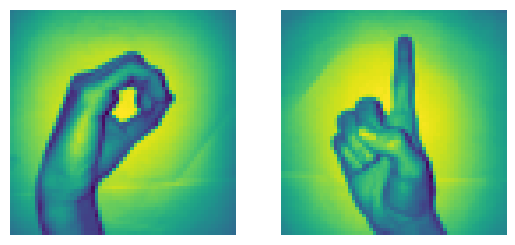

In [29]:
x_1 = np.load('data/X.npy')
Y_1 = np.load('data/Y.npy')

img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_1[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_1[900].reshape(img_size, img_size))
plt.axis('off')

In [30]:
X = np.concatenate((x_1[204:409], x_1[822:1027]), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0], 1)
print(f'X shape: {X.shape}')
print(f'Y shape: {Y.shape}')

X shape: (410, 64, 64)
Y shape: (410, 1)


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])

print(f'X train flatten {X_train_flatten.shape}')
print(f'X test flatten {X_test_flatten.shape}')

X train flatten (348, 4096)
X test flatten (62, 4096)


In [32]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

print(f'x train: {x_train.shape}')
print(f'x test: {x_test.shape}')
print(f'y train: {y_train.shape}')
print(f'y test: {y_test.shape}')

x train: (4096, 348)
x test: (4096, 62)
y train: (1, 348)
y test: (1, 62)


In [33]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {
        'weight1': np.random.randn(3, x_train.shape[0]) * 0.1,
        'bias1': np.zeros((3, 1)),
        'weight2': np.random.randn(y_train.shape[0], 3) * 0.1,
        'bias2': np.zeros((y_train.shape[0], 1))
    }
    return parameters

In [34]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters['weight1'], x_train) + parameters['bias1']
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters['weight2'], A1) + parameters['bias2']
    A2 = sigmoid(Z2)
    
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2,
    }
    
    return A2, cache

def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache['A2'] - Y
    dW2 = np.dot(dZ2, cache['A1'].T)/X.shape[1]
    db2 = np.sum(dZ2, axis=1, keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters['weight2'].T, dZ2) * (1-np.power(cache['A1'], 2))
    dW1 = np.dot(dZ1, X.T)/X.shape[1]
    db1 = np.sum(dZ1, axis=1, keepdims=True)/X.shape[1]
    grads = {
        'dweight1': dW1,
        'dbias1': db1,
        'dweight2': dW2,
        'dbias2': db2,
    }
    return grads

def update_parameters_NN(parameters, grads, learning_rate=0.01):
    parameters = {
        'weight1': parameters['weight1'] - learning_rate * grads['dweight1'],
        'bias1': parameters['bias1'] - learning_rate * grads['dbias1'],
        'weight2': parameters['weight2'] - learning_rate * grads['dweight2'],
        'bias2': parameters['bias2'] - learning_rate * grads['dbias2'],
    }
    return parameters

def predict_NN(parameters, x_test):
    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    return Y_prediction


def two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations):
    cost_list = []
    index_list = []
    
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation_NN(x_train, parameters)
        cost = compute_cost_NN(A2, y_train, parameters)
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print('Cost after iteration %i: %f' %(i, cost))
    
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation='vertical')
    plt.xlabel('Number of iteration')
    plt.ylabel('Cost')
    plt.show()
    
    y_prediction_test = predict_NN(parameters, x_test)
    y_prediction_train = predict_NN(parameters, x_train)
    
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    return parameters

Cost after iteration 0: 0.313958
Cost after iteration 100: 0.321558
Cost after iteration 200: 0.318935
Cost after iteration 300: 0.296353
Cost after iteration 400: 0.259022
Cost after iteration 500: 0.220907
Cost after iteration 600: 0.188055
Cost after iteration 700: 0.163450
Cost after iteration 800: 0.143478
Cost after iteration 900: 0.121172
Cost after iteration 1000: 0.114220
Cost after iteration 1100: 0.105415
Cost after iteration 1200: 0.096937
Cost after iteration 1300: 0.089571
Cost after iteration 1400: 0.082863
Cost after iteration 1500: 0.076234
Cost after iteration 1600: 0.069321
Cost after iteration 1700: 0.062631
Cost after iteration 1800: 0.056779
Cost after iteration 1900: 0.052008
Cost after iteration 2000: 0.048278
Cost after iteration 2100: 0.045325
Cost after iteration 2200: 0.042893
Cost after iteration 2300: 0.040819
Cost after iteration 2400: 0.039012


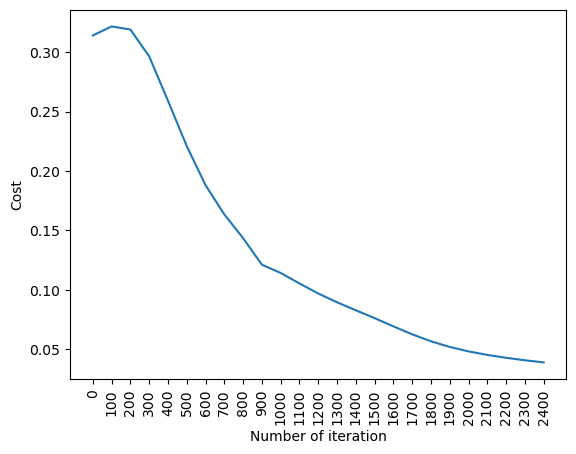

train accuracy: 99.71264367816092 %
test accuracy: 93.54838709677419 %


In [35]:
parameters = two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations=2500)